# K-Means

*Alunos:* <br>
    Pedro Santos Oliveira <br>
    Vinícius Nascimento Silva <br>

## Exercício 1

a) Executar o algoritmo K-Means para obter 3 clusters das amostras presentes no arquivo "data2.mat".

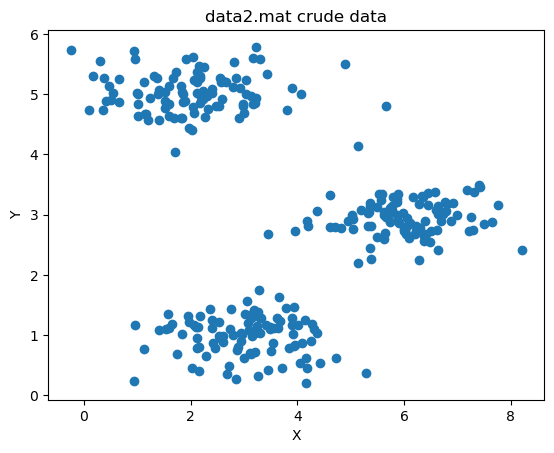

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# loadmat file to array
file = loadmat('Data/data2.mat')
data = np.array(file['X'])

# Plotting the data
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('data2.mat crude data')
plt.show()

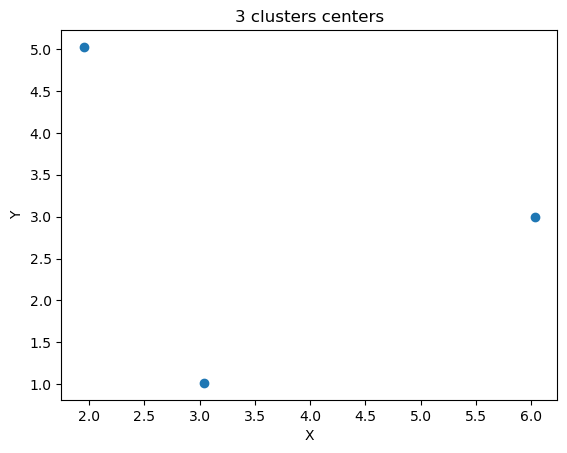

In [2]:
from sklearn.cluster import KMeans

# kmeans model
kmeans = KMeans(n_clusters=3).fit(data)

# Plotting centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('3 clusters centers')
plt.show()

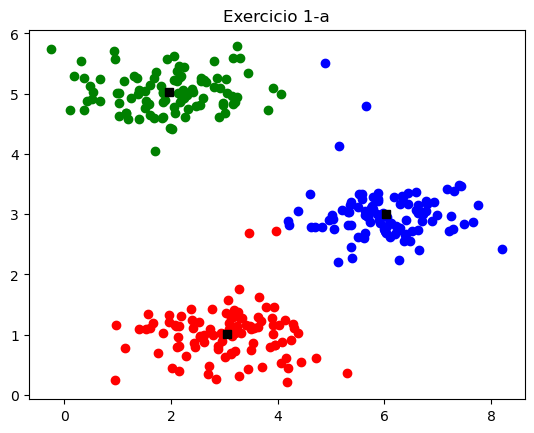

In [3]:
# define colors
color = ['red', 
         'green', 
         'blue', 
         'maroon', 
         'darkorange', 
         'navy',
         'pink',
         'aqua',
         'lime',
         'gold',
         'salmon',
         'gray',
         'olive',
         'magenta',
         'peru',
         'silver',
         'turquoise',
         'cornflowerblue', 
         'indigo', 
         'yellow']

def my_plot(predicts, title, centers=np.array([])):
    ax = plt.axes()
    
    # data to dict
    data_per_group = {}
    for group in set(predicts):
        data_per_group[group] = []
        for i in range(len(predicts)):
            if predicts[i] == group:
                data_per_group[group].append([data[i, 0], data[i, 1]])

    # plot data per group
    for group in data_per_group:
        for dat in data_per_group[group]:
            ax.plot(dat[0], dat[1], color[group], marker='o')

    # plot centers
    if not centers.size == 0:
        for center in centers:
            ax.plot(center[0], center[1], color='black', marker='s')

    ax.set_title(title)

    plt.show()

# plot predicts
predicts = kmeans.predict(data)
centers = kmeans.cluster_centers_
my_plot(predicts, 'Exercicio 1-a', centers)

b) Agora ajuste o algoritmo K-Means para diferentes números de clusters (1 a 20).

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


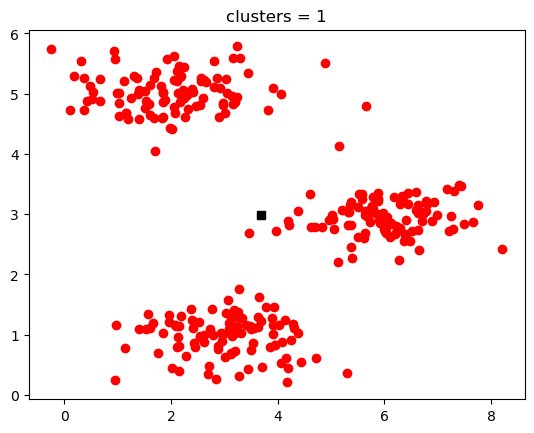

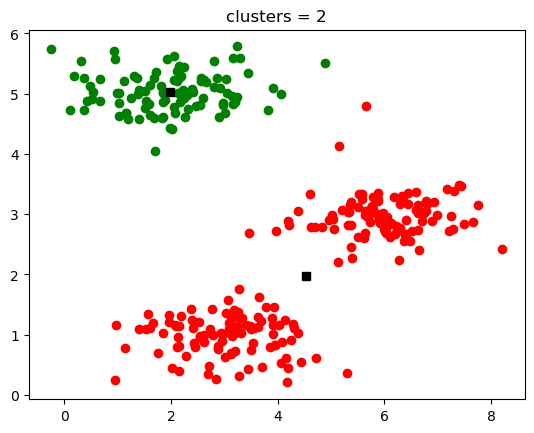

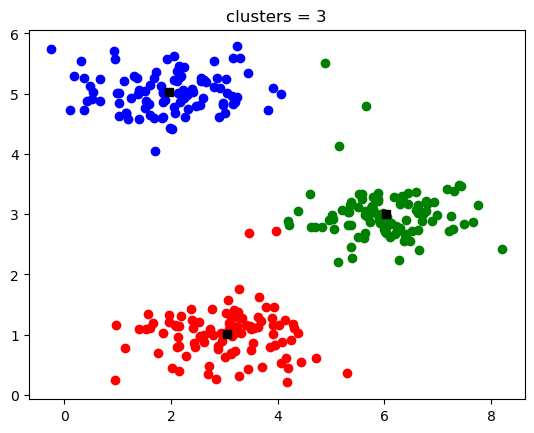

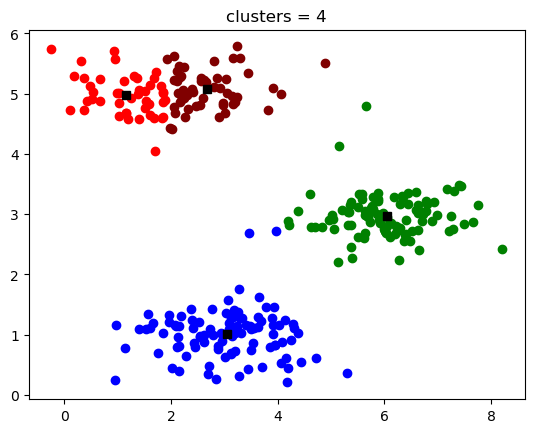

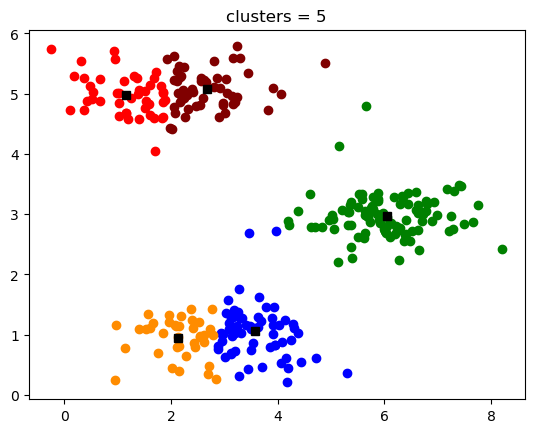

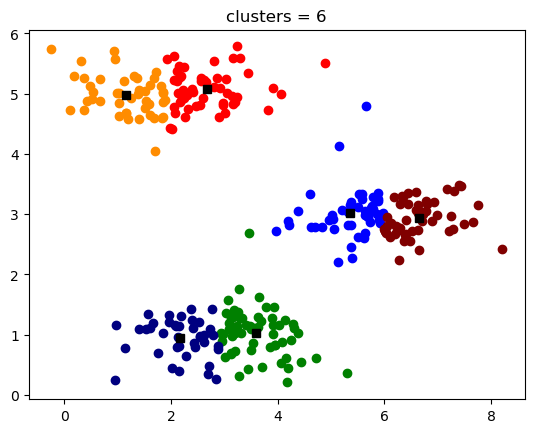

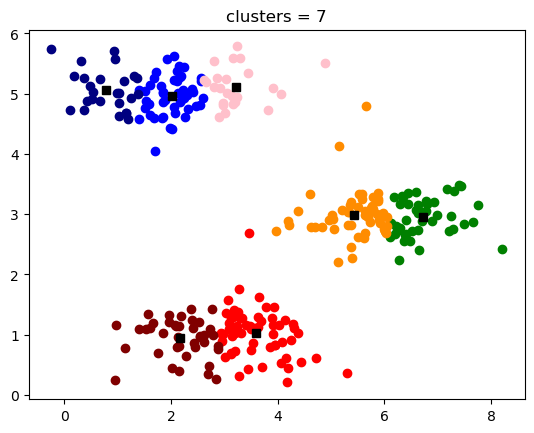

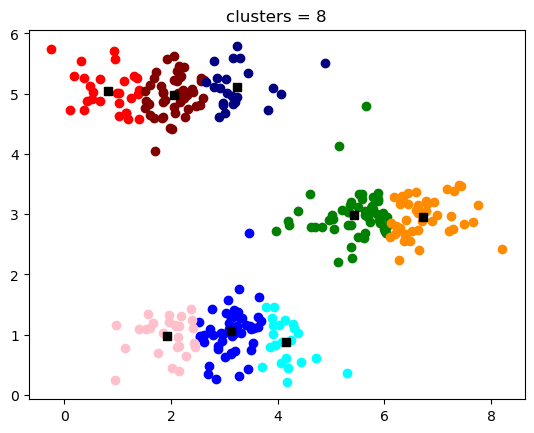

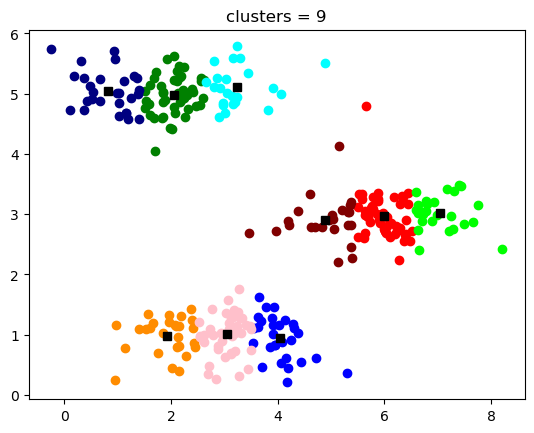

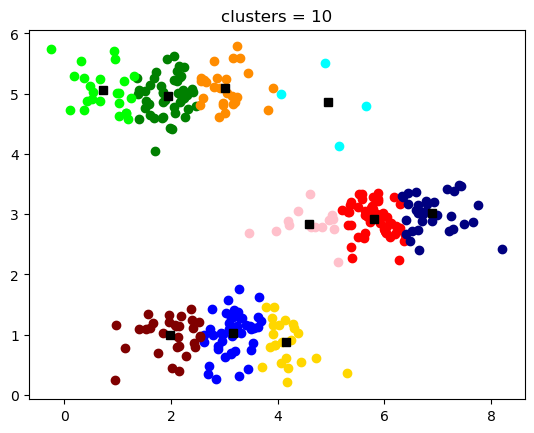

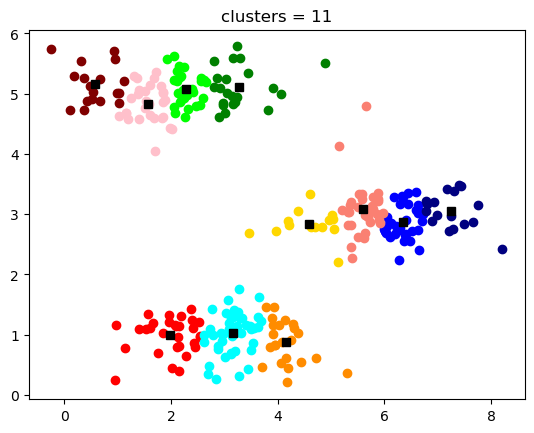

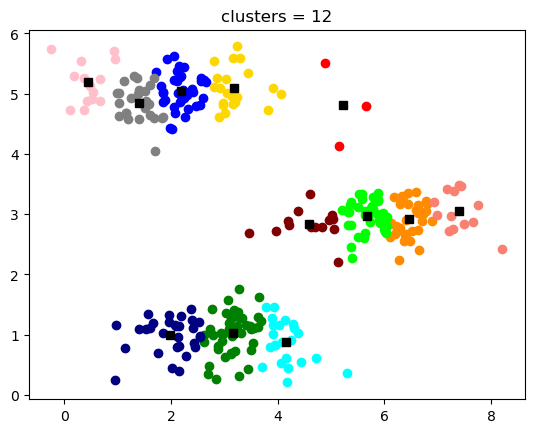

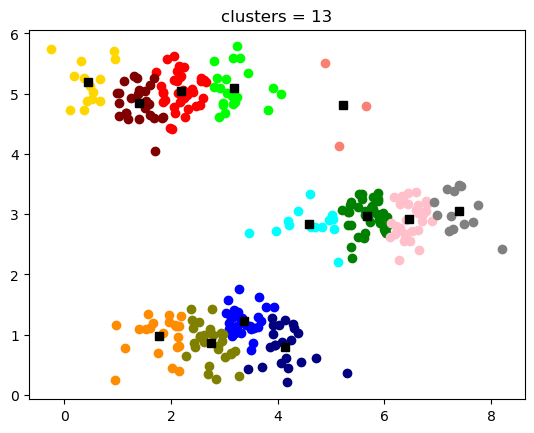

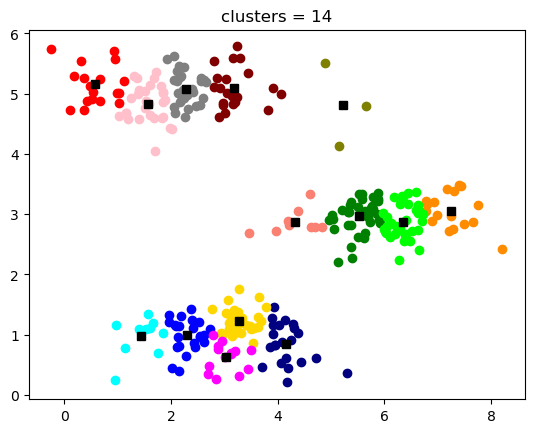

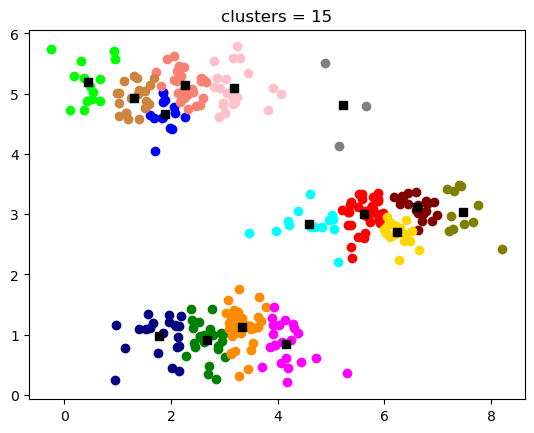

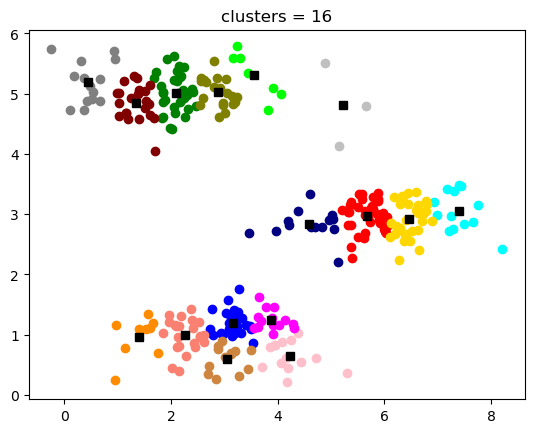

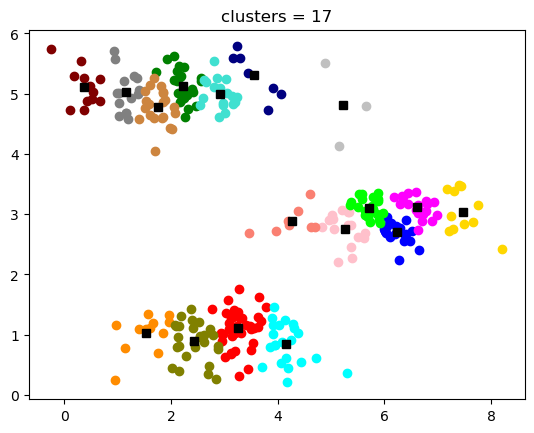

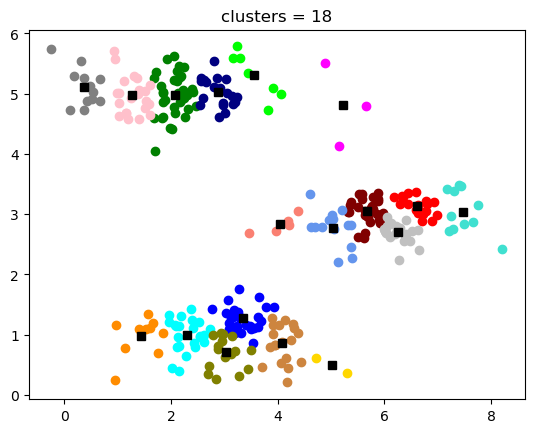

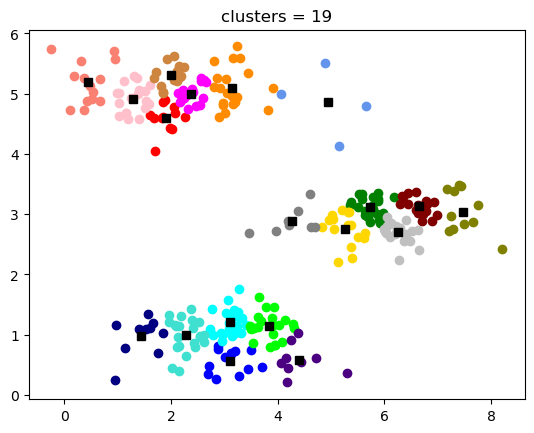

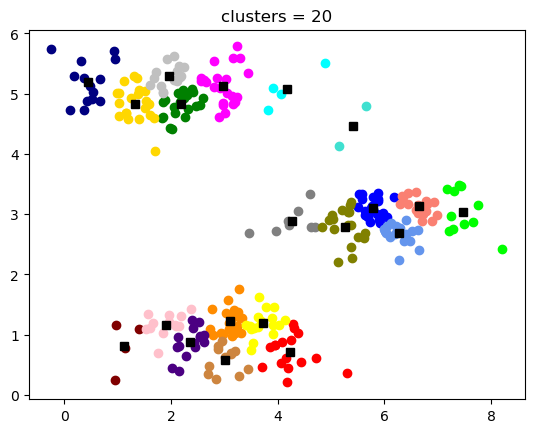

In [4]:
# kmeans for 1 a 20 models
kmeans_per_cluster = []
for i in range(1,21):
    kmeans_per_cluster.append(KMeans(n_clusters=i).fit(data))
    
    # plot predicts
    predicts = kmeans_per_cluster[i-1].predict(data)
    centers = kmeans_per_cluster[i-1].cluster_centers_
    my_plot(predicts, f'clusters = {i}', centers)


c) Para cada modelo, armazene o número de clusters e o valor da inércia (custo).

In [5]:
model_per_cluster = {}
for kmeans in kmeans_per_cluster:
    model_per_cluster[len(kmeans.cluster_centers_)] = kmeans.inertia_

for key in model_per_cluster:
    print(f'clusters: {key} \t Inertia: {model_per_cluster[key]}')

clusters: 1 	 Inertia: 1957.654720625167
clusters: 2 	 Inertia: 913.3192714747092
clusters: 3 	 Inertia: 266.65851965491936
clusters: 4 	 Inertia: 211.48222520142374
clusters: 5 	 Inertia: 161.26337347597646
clusters: 6 	 Inertia: 120.8028024266722
clusters: 7 	 Inertia: 102.45246741759019
clusters: 8 	 Inertia: 88.68586729391349
clusters: 9 	 Inertia: 76.24094337790115
clusters: 10 	 Inertia: 68.98763884514867
clusters: 11 	 Inertia: 62.47432099855137
clusters: 12 	 Inertia: 56.02152606325559
clusters: 13 	 Inertia: 50.75930163482895
clusters: 14 	 Inertia: 47.500241426442074
clusters: 15 	 Inertia: 45.232572353824345
clusters: 16 	 Inertia: 42.578653347166714
clusters: 17 	 Inertia: 40.320387218812165
clusters: 18 	 Inertia: 37.69358054499541
clusters: 19 	 Inertia: 34.57716979726342
clusters: 20 	 Inertia: 33.34465404666867


d) Plote a Inércia (custo) versus Nº de clusters. Parece haver um número ideal de cluster (método do cotovelo - elbow?

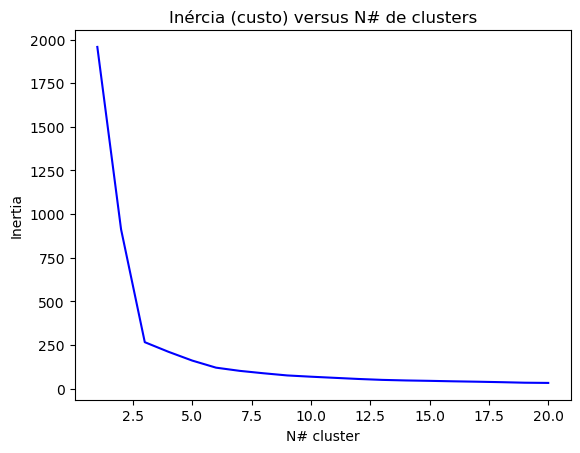

In [6]:
ax = plt.axes()

x = list(model_per_cluster.keys())
y = list(model_per_cluster.values())

ax.plot(x, y, 'blue')
ax.set_title('Inércia (custo) versus N# de clusters')
ax.set_xlabel('N# cluster')
ax.set_ylabel('Inertia')
plt.show()

O número 3 é a quantidade ideal de clusters para essa coleção.

e) Ajuste um modelo de agrupamento aglomerativo hierárquico (Hierarchical Agglomerative Clustering) com três clusters (escolha e teste diferentes tipos de linkage).

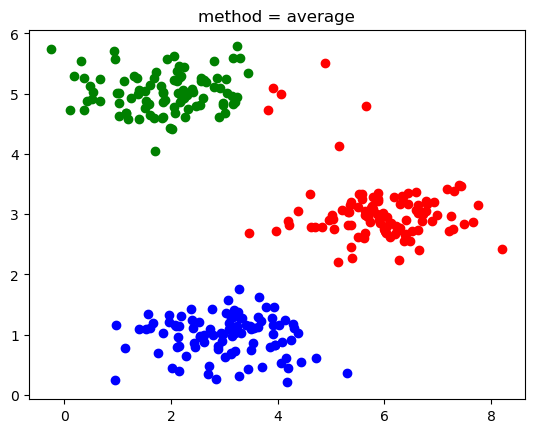

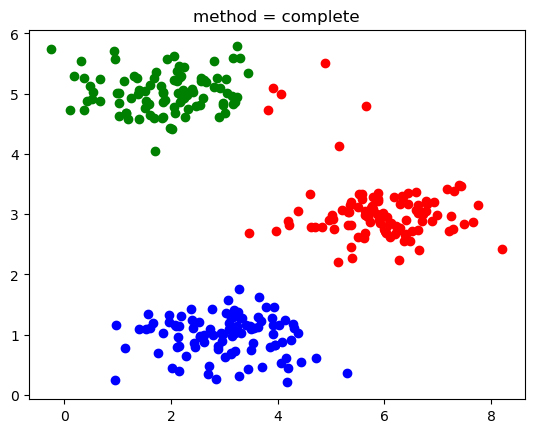

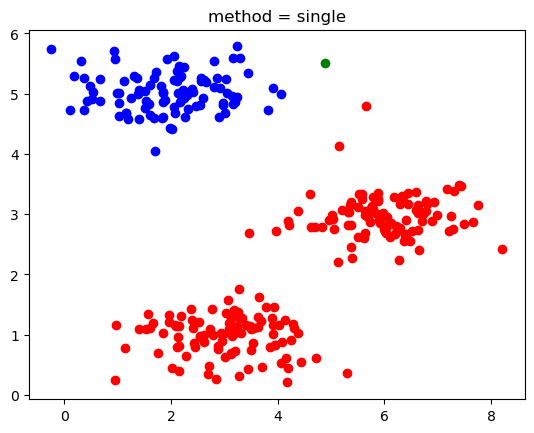

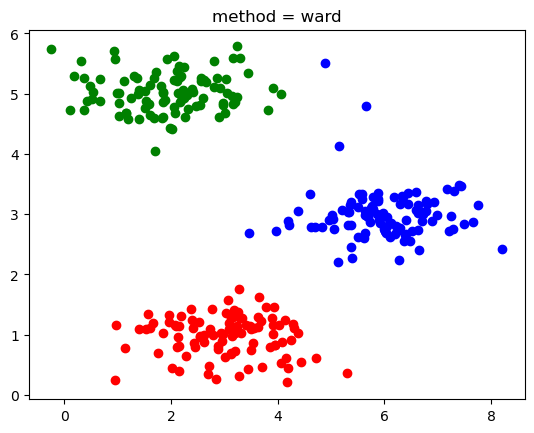

In [7]:
from sklearn.cluster import AgglomerativeClustering

methods = ['average', 'complete', 'single', 'ward']

hierarchies = []

for method in methods:
    agglomerative_model = AgglomerativeClustering(n_clusters=3, linkage=method).fit(data)
    result = agglomerative_model.fit_predict(data)
    
    my_plot(result, f'method = {method}')

f) Compare os resultados com os obtidos pelo k-means.

Ao observar os resultados apresentados pelos diferentes métodos de aglomeração hierárquica é possível observar que o paradigma Ward teve melhor resultado na separação dos clusters que favorece melhor inércia em 3 clusters. Já o método single teve o pior resultado ao agrupar dados muito distantes e propor 1 cluster com apenas 1 elemento. Em linhas gerais, os modelos complete e average apresentaram resultado muito parecido e ambos se sairam bem, mas acabaram misturando alguns elementos das bordas.

g) Visualize o dendrograma produzido pelo método de agrupamento aglomerativo Dica: O SciPy tem um módulo chamado cluster.hierarchy que contém as funções de linkage e dendrogram necessárias para criar o mapa de ligação (linkage) e traçar o dendrograma resultante.

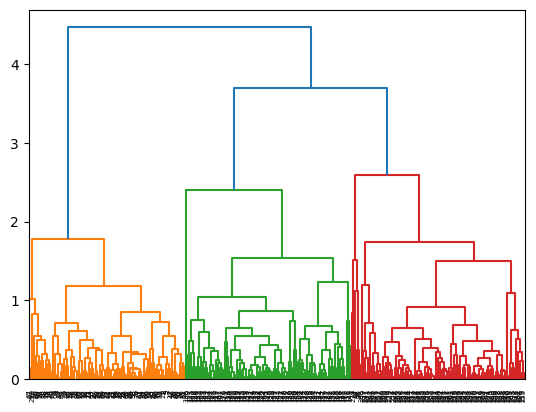

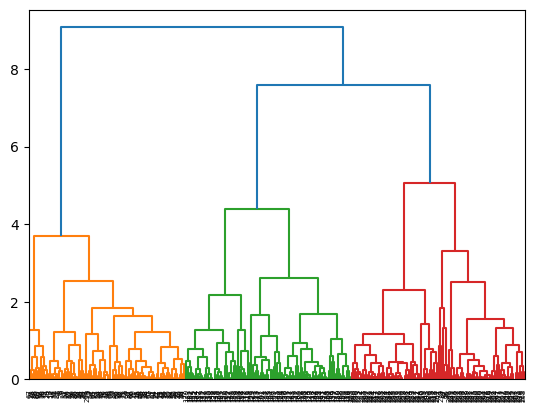

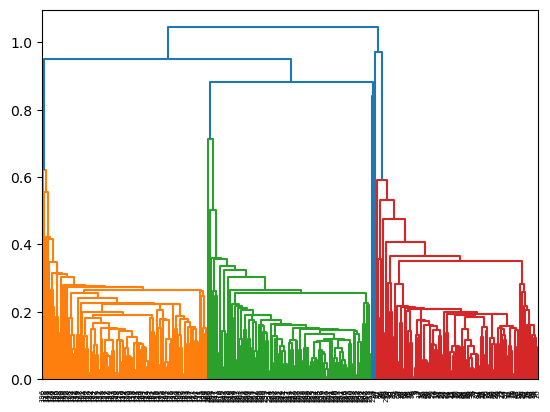

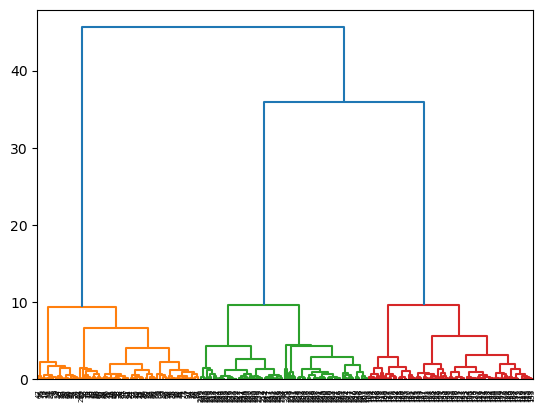

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

for method in methods:
    model = linkage(data, method)
    figure = plt.figure()
    dn = dendrogram(model)

plt.show()

## Exercício 2

Aplicar o K-Means para comprimir uma imagem

(128, 128, 3)


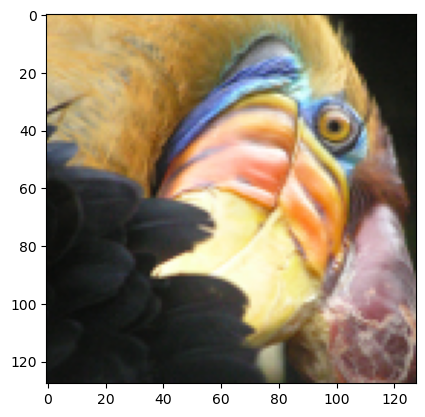

In [9]:
# loadmat and create array
file = loadmat('Data/bird_small.mat')
data = np.array(file['A'])
print(data.shape)
plt.imshow(data)

In [10]:
# normalize colors
colors = data / 255
colors = np.reshape(colors, (colors.shape[0] * colors.shape[1], colors.shape[2]))
print(colors,'\n')
print(colors.shape)

[[0.85882353 0.70588235 0.40392157]
 [0.90196078 0.7254902  0.45490196]
 [0.88627451 0.72941176 0.43137255]
 ...
 [0.25490196 0.16862745 0.15294118]
 [0.22745098 0.14509804 0.14901961]
 [0.20392157 0.15294118 0.13333333]] 

(16384, 3)


In [11]:
# Using K-Means to select colors
kmeans_colors = KMeans(n_clusters=16).fit(colors)
selected_colors = kmeans_colors.cluster_centers_
print(selected_colors)

[[0.16657727 0.16737827 0.15923714]
 [0.86949592 0.71809243 0.45681704]
 [0.97698225 0.94614284 0.81773651]
 [0.45713024 0.38729785 0.35522344]
 [0.46584348 0.33536843 0.18144401]
 [0.08512697 0.0922252  0.08203897]
 [0.56956863 0.72134902 0.86848627]
 [0.91818825 0.57212439 0.25278714]
 [0.28963088 0.260403   0.25741053]
 [0.58741848 0.4998968  0.44762093]
 [0.82788743 0.74632923 0.7372549 ]
 [0.96368423 0.85944045 0.63182836]
 [0.75895932 0.60857458 0.34326218]
 [0.70066936 0.62950401 0.56276165]
 [0.65220093 0.47372549 0.21304252]
 [0.38738152 0.45808552 0.6478113 ]]


In [12]:
# map colors
mapped_colors = selected_colors[kmeans_colors.predict(colors).astype(int), :]
print(mapped_colors)

[[0.86949592 0.71809243 0.45681704]
 [0.86949592 0.71809243 0.45681704]
 [0.86949592 0.71809243 0.45681704]
 ...
 [0.16657727 0.16737827 0.15923714]
 [0.16657727 0.16737827 0.15923714]
 [0.16657727 0.16737827 0.15923714]]


In [13]:
# reshape image
resized_image = np.reshape(mapped_colors, (data.shape[0], data.shape[1], data.shape[2]))
print(resized_image)

[[[0.86949592 0.71809243 0.45681704]
  [0.86949592 0.71809243 0.45681704]
  [0.86949592 0.71809243 0.45681704]
  ...
  [0.08512697 0.0922252  0.08203897]
  [0.08512697 0.0922252  0.08203897]
  [0.08512697 0.0922252  0.08203897]]

 [[0.86949592 0.71809243 0.45681704]
  [0.86949592 0.71809243 0.45681704]
  [0.86949592 0.71809243 0.45681704]
  ...
  [0.08512697 0.0922252  0.08203897]
  [0.08512697 0.0922252  0.08203897]
  [0.08512697 0.0922252  0.08203897]]

 [[0.86949592 0.71809243 0.45681704]
  [0.86949592 0.71809243 0.45681704]
  [0.86949592 0.71809243 0.45681704]
  ...
  [0.08512697 0.0922252  0.08203897]
  [0.08512697 0.0922252  0.08203897]
  [0.08512697 0.0922252  0.08203897]]

 ...

 [[0.08512697 0.0922252  0.08203897]
  [0.08512697 0.0922252  0.08203897]
  [0.08512697 0.0922252  0.08203897]
  ...
  [0.28963088 0.260403   0.25741053]
  [0.16657727 0.16737827 0.15923714]
  [0.28963088 0.260403   0.25741053]]

 [[0.08512697 0.0922252  0.08203897]
  [0.08512697 0.0922252  0.08203897]


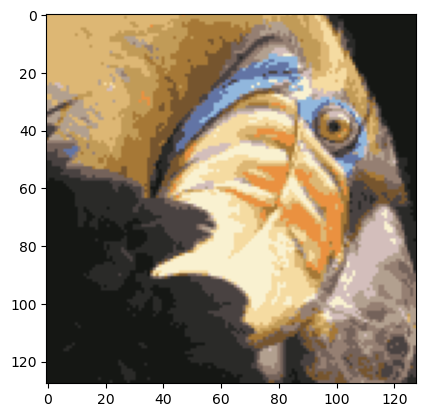

In [14]:
# show result
plt.imshow(resized_image)